In [1]:
from UTILITY_quickstart import *

importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml")

In [2]:
csrTF = True


bunchCount = importedDefaultSettings["bunchCount"]

tao = initializeTao(
    inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    
    csrTF = csrTF,
    numMacroParticles=1e5,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

setLattice(tao, **importedDefaultSettings)



launchTwissCorrection(tao)


# tao.cmd(f"set element beginning beta_a = {101}")
# tao.cmd(f"set element beginning alpha_a = {-26.1}")
# tao.cmd(f"set element beginning beta_b = {101}")
# tao.cmd(f"set element beginning alpha_b = {-26.1}")


trackBeam(tao, trackEnd = "PR10571", **importedDefaultSettings)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 100000.0
Beam created, written to /tmp/beams/activeBeamFile_1994845619103423095.h5, and reinit to tao
No evalElement provided. Assuming golden lattice PR10571
Optimization Results:
Optimal Parameters: [28.77872199 13.3970811  23.51278494 16.8307956 ]
Objective Function Value at Optimal Parameters: 9.505958617749993e-12
Number of Iterations: 260
Converged: True


In [3]:
P = getBeamAtElement(tao, "L0AFEND")

In [4]:
P.twiss(plane = 'x', fraction = 0.9)

{'alpha_x': -26.131068674797646,
 'beta_x': 101.33688814956383,
 'gamma_x': 6.748112780784399,
 'emit_x': 1.2586030122289853e-08,
 'eta_x': -6.645685478236424e-05,
 'etap_x': -1.776021182368519e-05,
 'norm_emit_x': 1.6901761675088764e-06}

In [5]:
P.twiss(plane = 'y', fraction = 0.9)

{'alpha_y': -26.14470931902942,
 'beta_y': 101.40193454305636,
 'gamma_y': 6.7508162291112725,
 'emit_y': 1.2592056701012996e-08,
 'eta_y': 0.00012309223733528559,
 'etap_y': 2.9998134261575178e-05,
 'norm_emit_y': 1.6909900366545903e-06}

In [6]:
importedDefaultSettings["inputBeamFilePathSuffix"]

'/beams/2024-10-22_Impact_OneBunch/2024-10-22_oneBunch.h5'

In [7]:
P = ParticleGroup("./beams/2024-10-22_Impact_OneBunch/2024-10-22_oneBunch.h5")

In [8]:
P.twiss(plane = 'x', fraction = 0.9)

{'alpha_x': -26.131068674797646,
 'beta_x': 101.33688814956383,
 'gamma_x': 6.748112780784399,
 'emit_x': 1.2586030122289853e-08,
 'eta_x': -6.645685478237736e-05,
 'etap_x': -1.7760211823688302e-05,
 'norm_emit_x': 1.6901761675088764e-06}

In [9]:
P.twiss(plane = 'y', fraction = 0.9)

{'alpha_y': -26.14470931902942,
 'beta_y': 101.40193454305636,
 'gamma_y': 6.7508162291112725,
 'emit_y': 1.2592056701012996e-08,
 'eta_y': 0.00012309223733529496,
 'etap_y': 2.999813426157727e-05,
 'norm_emit_y': 1.6909900366545903e-06}

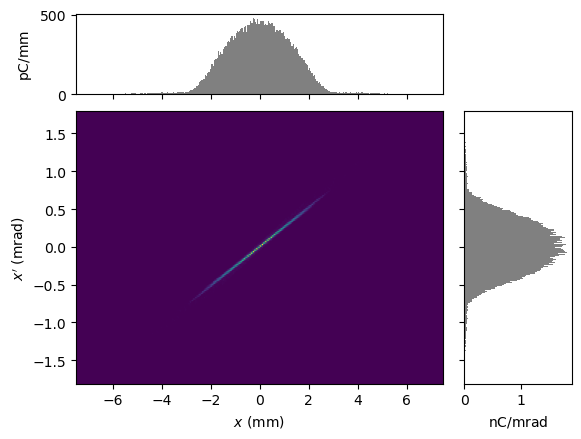

<Figure size 640x480 with 0 Axes>

In [10]:
display(plotMod(P, 'x', 'xp', bins=300))
plt.clf()

In [11]:
np.std(P.x)

0.0014195012801092883

In [12]:
smallestIntervalImpliedSigma(P.x)

0.0012849029116952313

In [13]:
np.sqrt( 101.40193454305 * 1.2586030122289853e-08 )

0.0011297113802282825

In [14]:
P = getBeamAtElement(tao, "PR10571")

In [15]:
P.twiss(plane = 'x', fraction = 0.9)

{'alpha_x': -1.8303551195049277,
 'beta_x': 5.135762091658319,
 'gamma_x': 0.8470407674381261,
 'emit_x': 9.654419944672309e-09,
 'eta_x': 0.00010538848196435952,
 'etap_x': 6.516956011595832e-05,
 'norm_emit_x': 2.3261956748799953e-06}

In [16]:
P.twiss(plane = 'y', fraction = 0.9)

{'alpha_y': -0.0718375960842645,
 'beta_y': 2.3837886704343294,
 'gamma_y': 0.4216651638117,
 'emit_y': 7.052612157844399e-09,
 'eta_y': 0.00025137310291900784,
 'etap_y': 5.828623566879295e-06,
 'norm_emit_y': 1.6992809569582388e-06}

In [17]:
tao.ele_twiss("PR10571")

{'mode_flip': False,
 'beta_a': 5.73666587363594,
 'alpha_a': -2.14411370059491,
 'gamma_a': 0.975692795148139,
 'phi_a': 7.31755473282922,
 'eta_a': 4.44208173883061e-18,
 'etap_a': 2.39353339300433e-17,
 'beta_b': 2.57530149300807,
 'alpha_b': 0.0101610332245751,
 'gamma_b': 0.388344141185592,
 'phi_b': 8.22732446153028,
 'eta_b': -6.54597950722192e-37,
 'etap_b': -8.75519654512594e-38,
 'eta_x': 4.44208173883061e-18,
 'etap_x': 2.39353339300433e-17,
 'eta_y': -7.71096119937701e-37,
 'etap_y': 9.21848220971573e-38}